In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Pontos usados para os splines da questão 

x = np.array([1.6, 2, 2.5, 3.2, 4, 4.5])
y = np.array([2, 8, 14, 15, 8, 2])

LETRA A) SPLINE QUADRÁTICA

In [47]:
def spline_quadratica(x, y):

    n = len(x) - 1
    matriz_spline_quadratica = np.zeros((3*n, 3*n)) # Matriz vazia
    B_spline_quadratica = np.zeros((3*n)) # Vetor de resultados 

    index_0 = 0

    for i in range(n):
        matriz_spline_quadratica[index_0, 3*i] = x[i]**2
        matriz_spline_quadratica[index_0, 3*i + 1] = x[i]
        matriz_spline_quadratica[index_0, 3*i + 2] = 1
        B_spline_quadratica[index_0] = y[i]
        index_0 += 1


        matriz_spline_quadratica[index_0, 3*i]   = x[i+1]**2
        matriz_spline_quadratica[index_0, 3*i+1] = x[i+1]
        matriz_spline_quadratica[index_0, 3*i+2] = 1
        B_spline_quadratica[index_0] = y[i+1]
        index_0 += 1

    for i in range(1, n):
    
        matriz_spline_quadratica[index_0, 3*(i-1)]   = 2 * x[i]
        matriz_spline_quadratica[index_0, 3*(i-1)+1] = 1        
    
        matriz_spline_quadratica[index_0, 3*i]   = -2 * x[i] 
        matriz_spline_quadratica[index_0, 3*i+1] = -1       
    
        B_spline_quadratica[index_0] = 0
        index_0 += 1


    matriz_spline_quadratica[index_0, 0] = 1
    B_spline_quadratica[index_0] = 0


    coeficientes = np.linalg.solve(matriz_spline_quadratica, B_spline_quadratica)
    spline_coeficientes = coeficientes.reshape(n, 3)

    plt.figure(figsize=(10,6))

    for i in range(n):
        a_i, b_i, c_i = spline_coeficientes[i]

        x_i = np.linspace(x[i], x[i+1], 100)

        y_i = a_i * x_i**2 + b_i * x_i + c_i

        plt.plot(x_i, y_i)

    plt.scatter(x, y, color='red', s=100)
    plt.title('Gráfico da Spline Quadrática')
    plt.xlabel('Eixo x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()

    return spline_coeficientes


C:\Users\vicen\AppData\Local\Temp\ipykernel_23796\2056869590.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


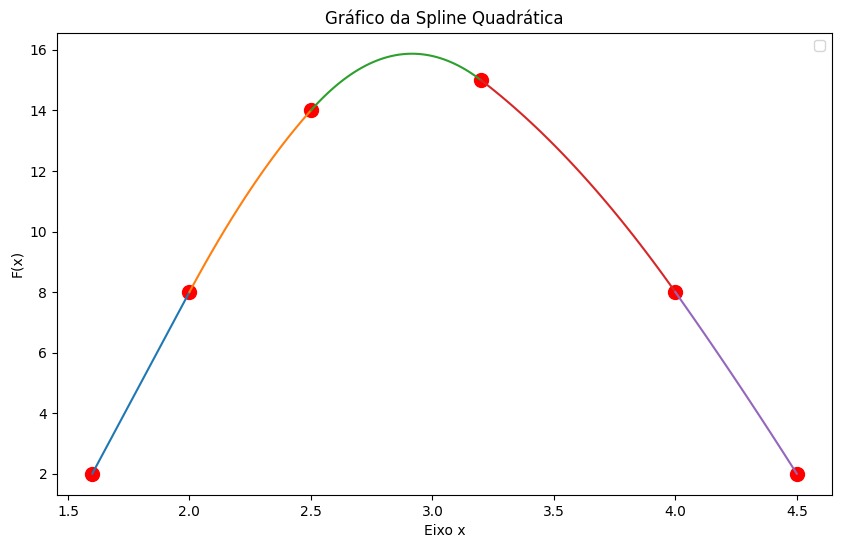

In [48]:
SQ = spline_quadratica(x, y)

LETRA B) SPLINE CÚBICA

In [50]:
def spline_cubica(x, y):
    n = len(x) - 1
    matriz_spline_cubica = np.zeros([4*n, 4*n])
    B_spline_cubica = np.zeros((4*n))

    index_1 = 0

    for i in range(n):
    # Preenchimento do intervalo (x(i), x(i+1))
        matriz_spline_cubica[index_1, 4*i] = x[i]**3
        matriz_spline_cubica[index_1, 4*i + 1] = x[i]**2
        matriz_spline_cubica[index_1, 4*i + 2] = x[i]
        matriz_spline_cubica[index_1, 4*i + 3] = 1
        B_spline_cubica[index_1] = y[i]
        index_1 += 1

        matriz_spline_cubica[index_1, 4*i] = x[i+1]**3
        matriz_spline_cubica[index_1, 4*i + 1] = x[i+1]**2
        matriz_spline_cubica[index_1, 4*i + 2] = x[i+1]
        matriz_spline_cubica[index_1, 4*i + 3] = 1
        B_spline_cubica[index_1] = y[i+1]
        index_1 += 1

    for i in range(1, n):
    # Continuidade da primeira derivada
        matriz_spline_cubica[index_1, 4*(i-1)] = 3 * x[i]**2
        matriz_spline_cubica[index_1, 4*(i-1) + 1] = 2 * x[i]
        matriz_spline_cubica[index_1, 4*(i-1) + 2] = 1

        matriz_spline_cubica[index_1, 4*(i)] = - 3 * x[i]**2
        matriz_spline_cubica[index_1, 4*(i) + 1] = - 2 * x[i]
        matriz_spline_cubica[index_1, 4*(i) + 2] = -1      
 
        B_spline_cubica[index_1] = 0
        index_1 += 1

    for i in range(1, n):
    # Continuidade da segunda derivada
        matriz_spline_cubica[index_1, 4*(i-1)] = 6 * x[i]
        matriz_spline_cubica[index_1, 4*(i-1) + 1] = 2

        matriz_spline_cubica[index_1, 4*i] = -6 * x[i]
        matriz_spline_cubica[index_1, 4*i + 1] = -2
    
        B_spline_cubica[index_1] = 0
        index_1 += 1



    # Condições de fronteira

    matriz_spline_cubica[index_1, 0] = 6 * x[0]
    matriz_spline_cubica[index_1, 1] = 2
    B_spline_cubica[index_1] = 0
    index_1 += 1

    matriz_spline_cubica[index_1, 4*(n-1)]   = 6 * x[n]
    matriz_spline_cubica[index_1, 4*(n-1)+1] = 2
    B_spline_cubica[index_1] = 0
    index_1 += 1


    coeficientes_1 = np.linalg.solve(matriz_spline_cubica, B_spline_cubica)
    spline_coeficientes_1 = coeficientes_1.reshape(n, 4)

    plt.figure(figsize=(10,6))

    for i in range(n):
        a, b, c, d = spline_coeficientes_1[i]

        x_i = np.linspace(x[i], x[i+1], 100)

        y_i = a * x_i**3 + b * x_i**2 + c * x_i + d

        plt.plot(x_i, y_i)

    plt.scatter(x, y, color='red', s=100)
    plt.title('Gráfico da Spline cubica')
    plt.xlabel('Eixo x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()

    return spline_coeficientes_1

C:\Users\vicen\AppData\Local\Temp\ipykernel_23796\1942088953.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


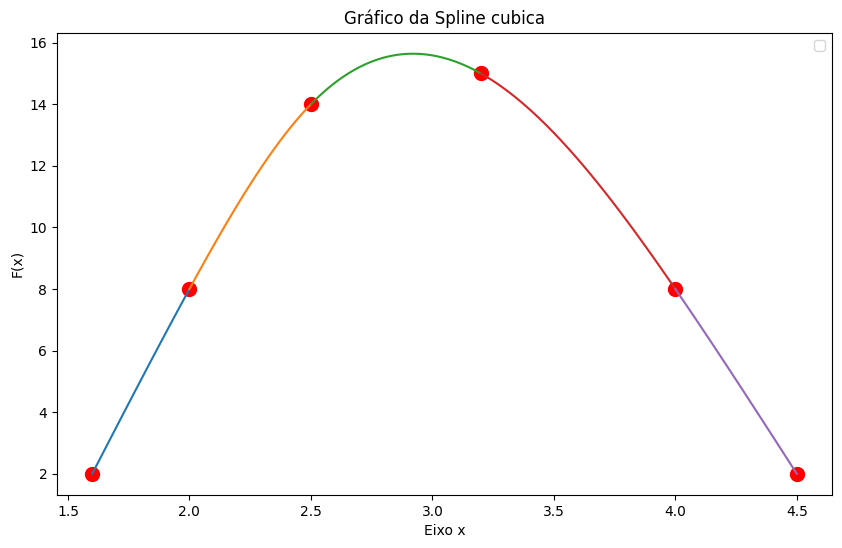

In [51]:
SC = spline_cubica(x, y)

LETRA C) Estimar o valor de f(2,8) pelos dois métodos

In [60]:
x_atual = 2.8

Coefs_estimativa_quadratica = SQ[2]
Coefs_estimativa_cubica = SC[2]

a_q, b_q, c_q = Coefs_estimativa_quadratica
a_c, b_c, c_c, d_c = Coefs_estimativa_cubica

y_estimativa_quadratica = a_q*(x_atual**2) + b_q*x_atual + c_q

y_estimativa_cubica = a_c*(x_atual**3) + b_c*(x_atual**2) + c_c*x_atual + d_c

print("Para x = 2.8, temos: ")
print(f"valor de f(x) na estimativa Quadrática: {y_estimativa_quadratica}")
print(f"valor de f(x) na estimativa Cúbica: {y_estimativa_cubica}")



Para x = 2.8, temos: 
valor de f(x) na estimativa Quadrática: 15.7265306122449
valor de f(x) na estimativa Cúbica: 15.515354832040074
